In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
)

from features import (
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSignals,
    ForexRSISignals,
    ForexStochasticSignals,
    ForexWilliamsRSignals,
    ForexCCISignals,
    ForexATRSignals
)

import warnings
warnings.filterwarnings('ignore')

data = ForexDataLoad(file_path = '../data/xauaud.csv').data
ohlcv_data = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data)
data = cleaner.fast_cleaner()

trend_data = ForexTrendIndicators(data = data).generate_all_trend_indicators(
    macd_fast_slow_signal = [[12,26,9], [6,13,4], [24,36,8], [7,19,4]], 
    adx_periods = [ 7, 14, 21, 28],
    sar_acc_max = [[0.02, 0.2], [0.04, 0.4], [0.06, 0.6], [0.01, 0.01]]
)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers 
5 fast_cleaner
Keep = first and subset = None
Removed 0 duplicate entries
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent
Found 1 missing values
 dropped: 1 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent
TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 generate_all_trend_indicators
Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 71 columns):
 #   Column            

In [2]:
sar_signals = ForexParabolicSARSignals(
    data = trend_data[0],
    parameters = trend_data[1]['sar_params']
)

PARABOLIC SAR SIGNAL GENERATION
 Available Functions: 
1. sar_trend_signals 
2. sar_reversal_signals 
3. sar_distance_signals 
4. sar_slope_signals 
5. sar_trend_confirmation_signals
6. generate_all_sar_signals


In [3]:
trend_signals_data =sar_signals.generate_all_sar_signals()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   close                             38216 non-null  float64
 1   sar_0.02_0.2_trend                38216 non-null  int64  
 2   sar_0.04_0.4_trend                38216 non-null  int64  
 3   sar_0.06_0.6_trend                38216 non-null  int64  
 4   sar_0.01_0.01_trend               38216 non-null  int64  
 5   sar_0.02_0.2_reversal             38216 non-null  int64  
 6   sar_0.04_0.4_reversal             38216 non-null  int64  
 7   sar_0.06_0.6_reversal             38216 non-null  int64  
 8   sar_0.01_0.01_reversal            38216 non-null  int64  
 9   sar_0.02_0.2_distance             38216 non-null  int64  
 10  sar_0.04_0.4_distance             38216 non-null  int64  
 11  sar_0.06_0.6_distance 

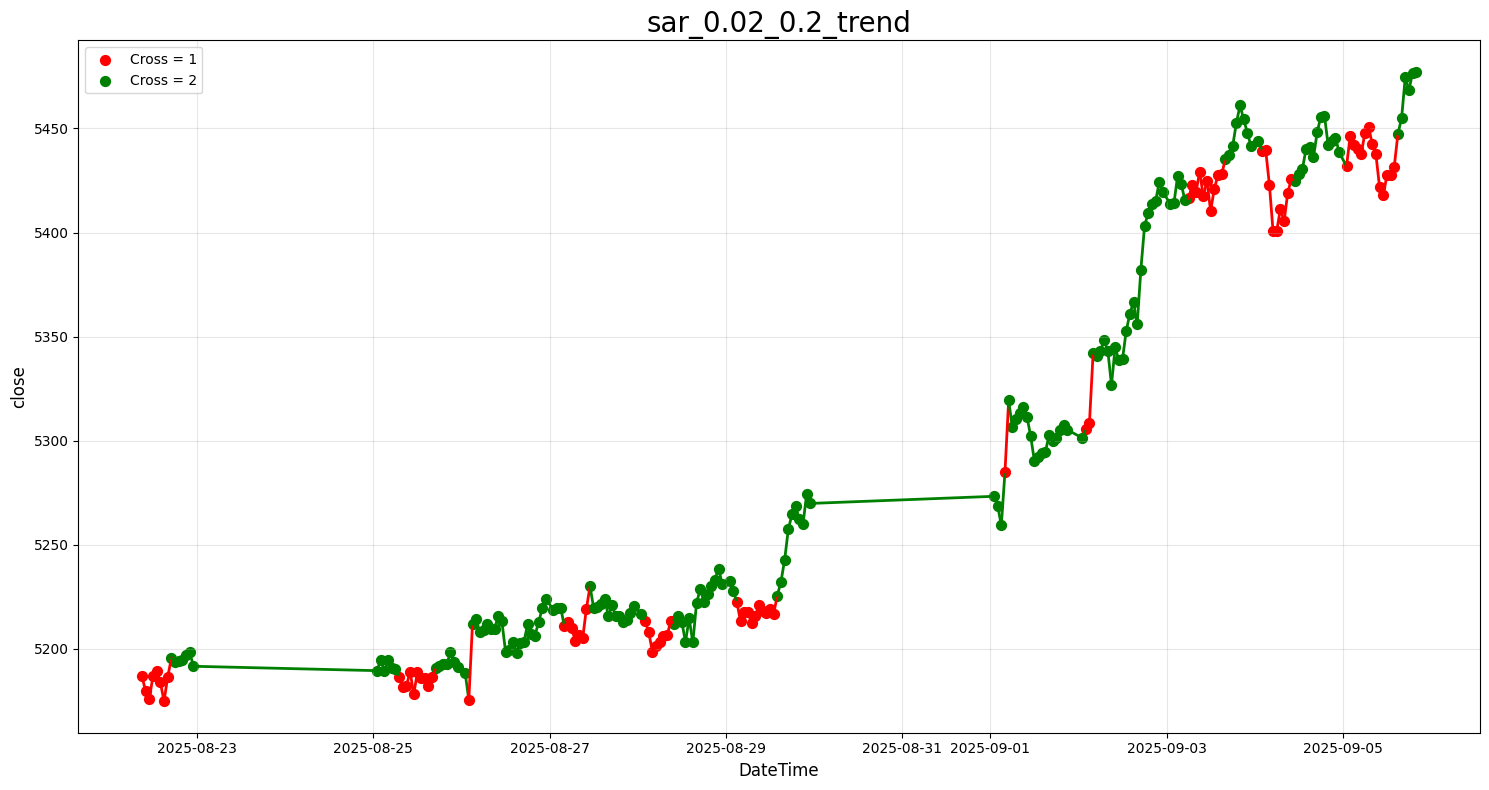

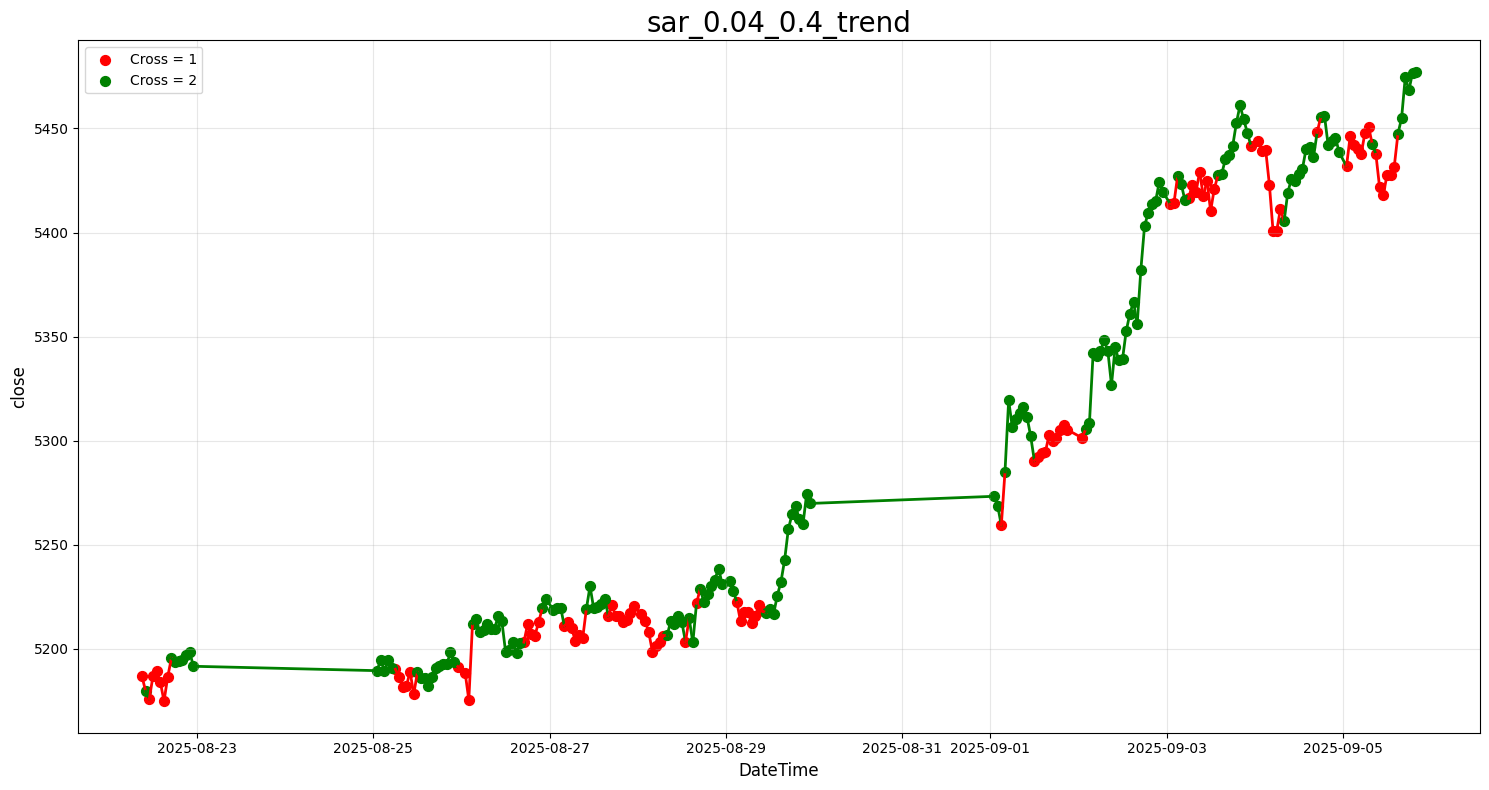

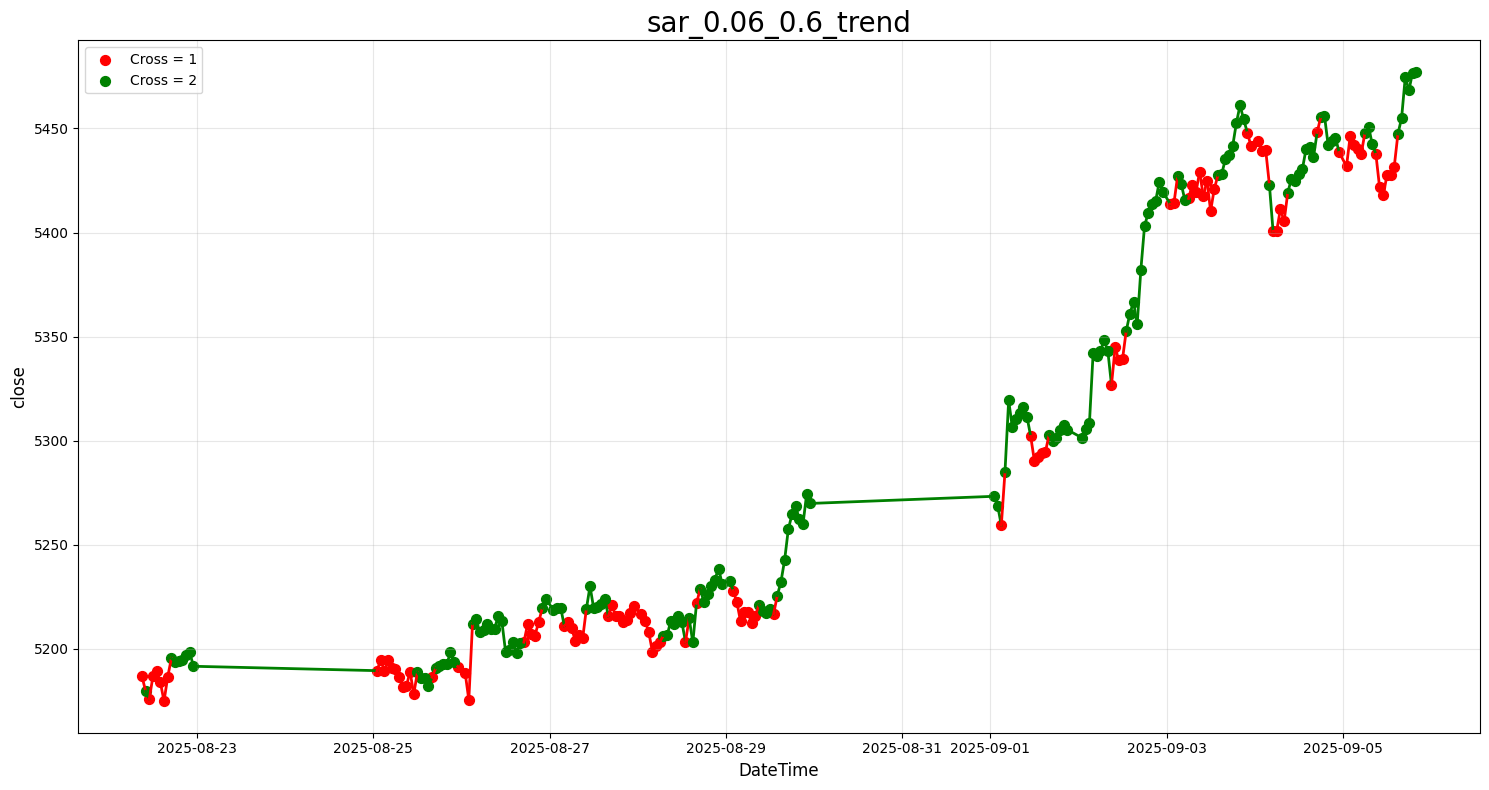

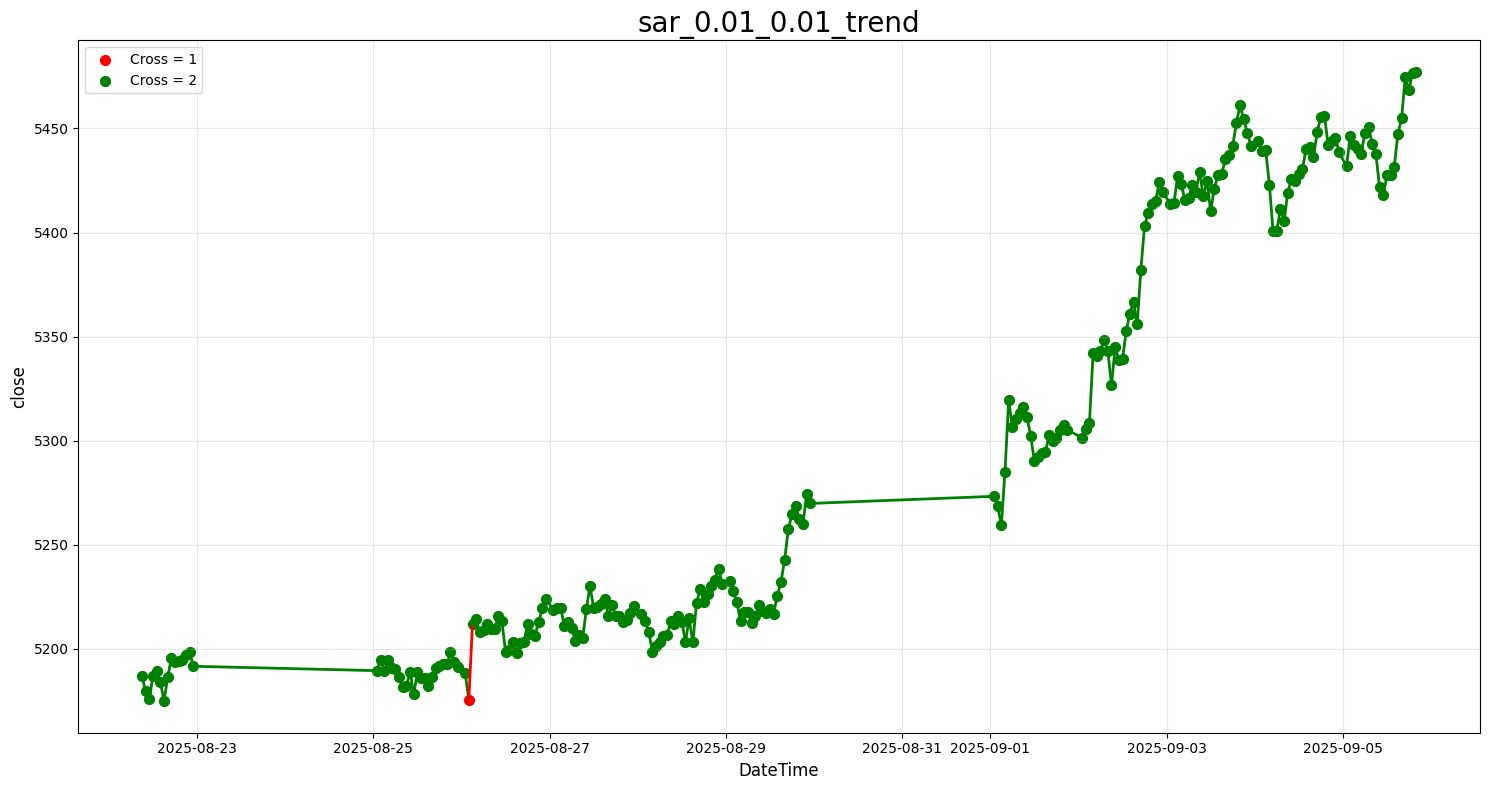

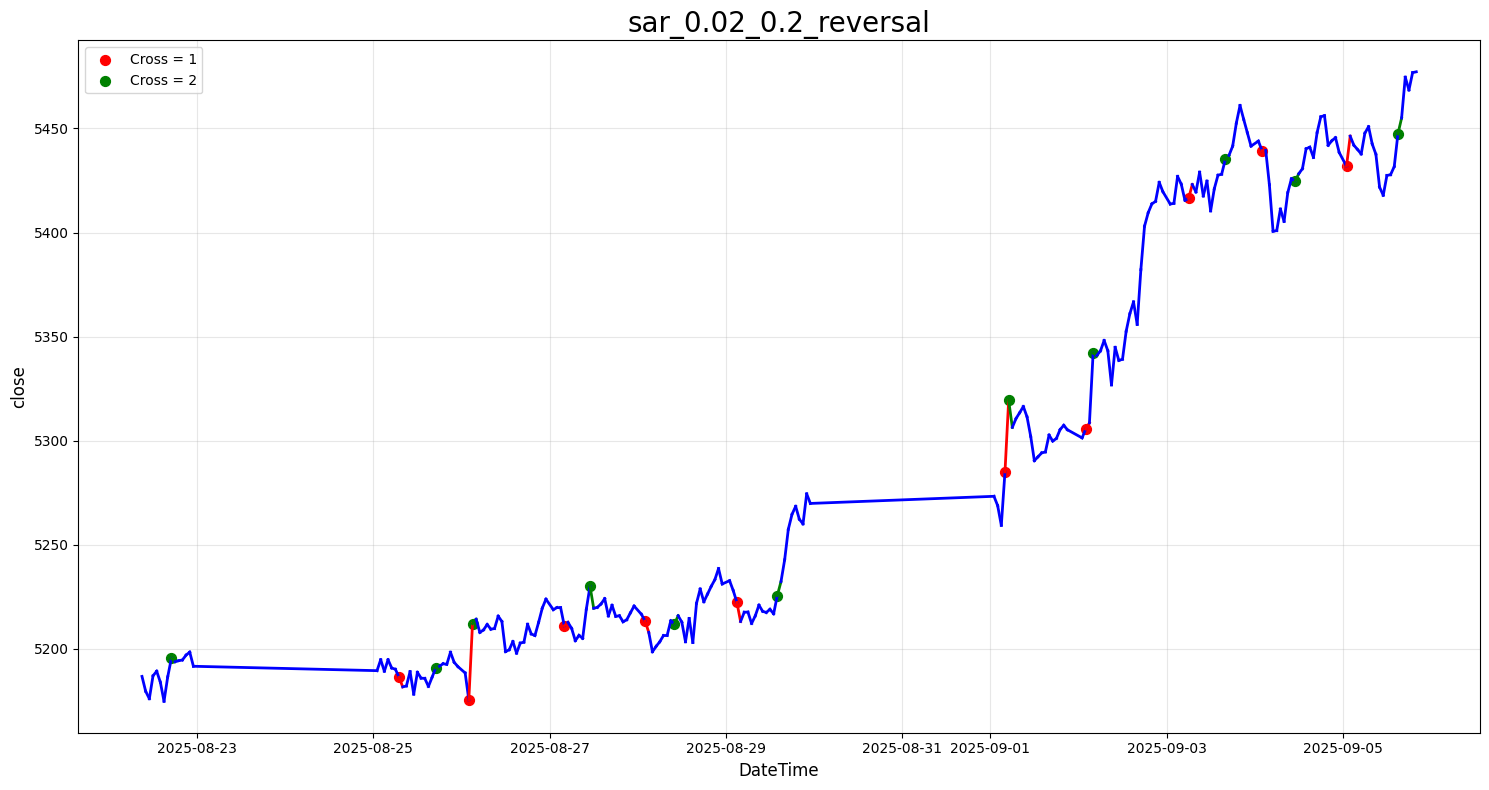

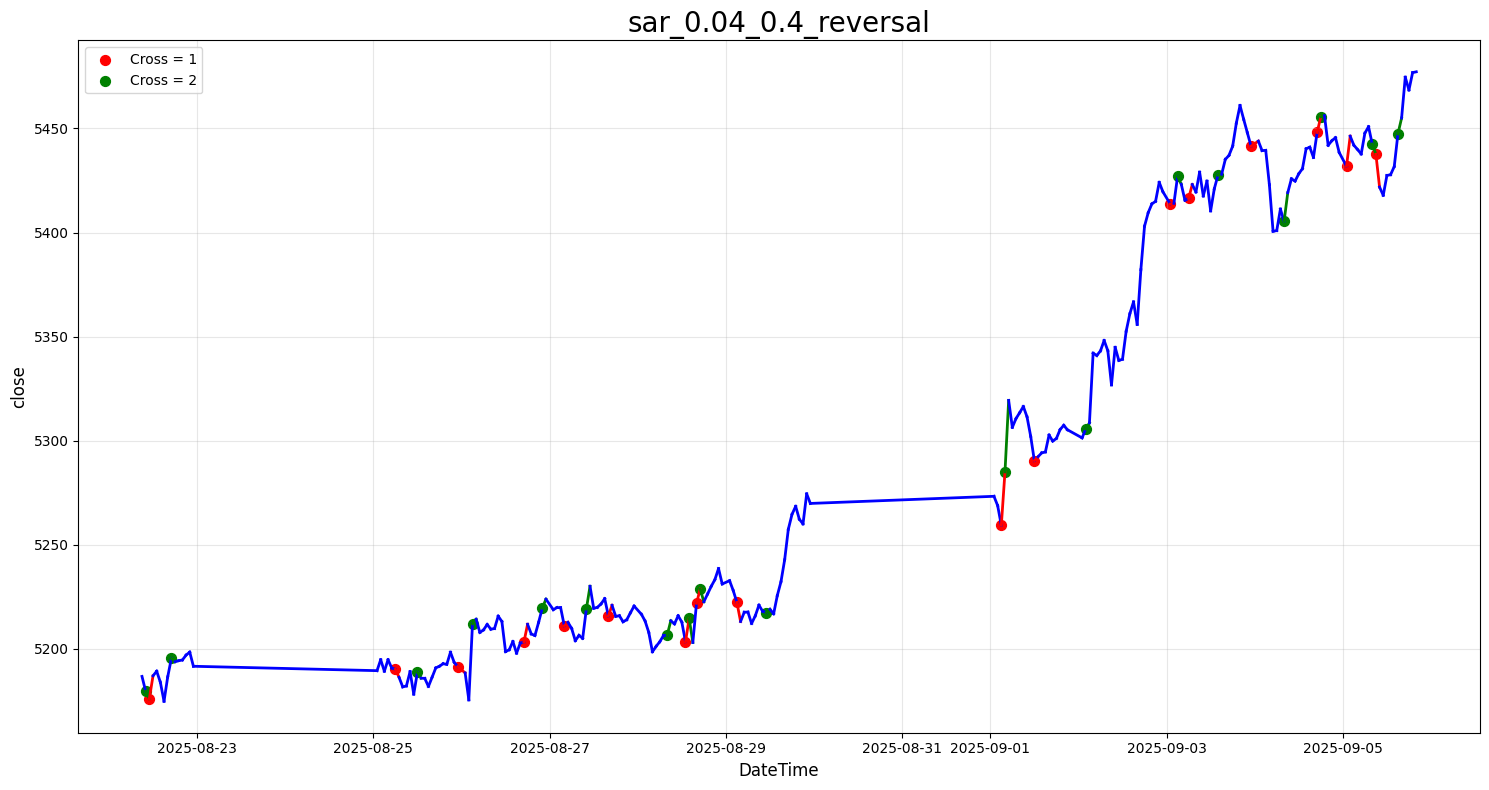

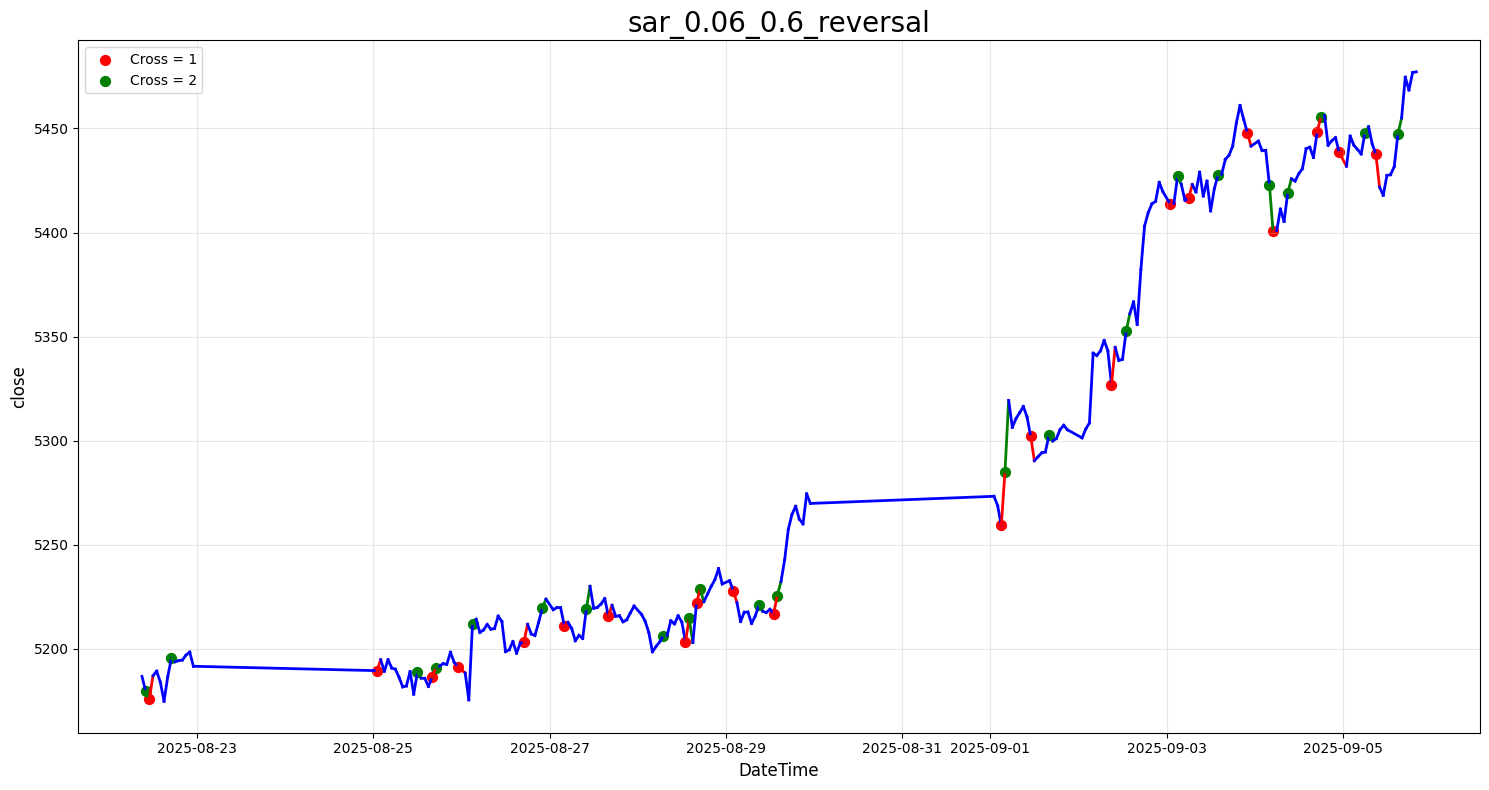

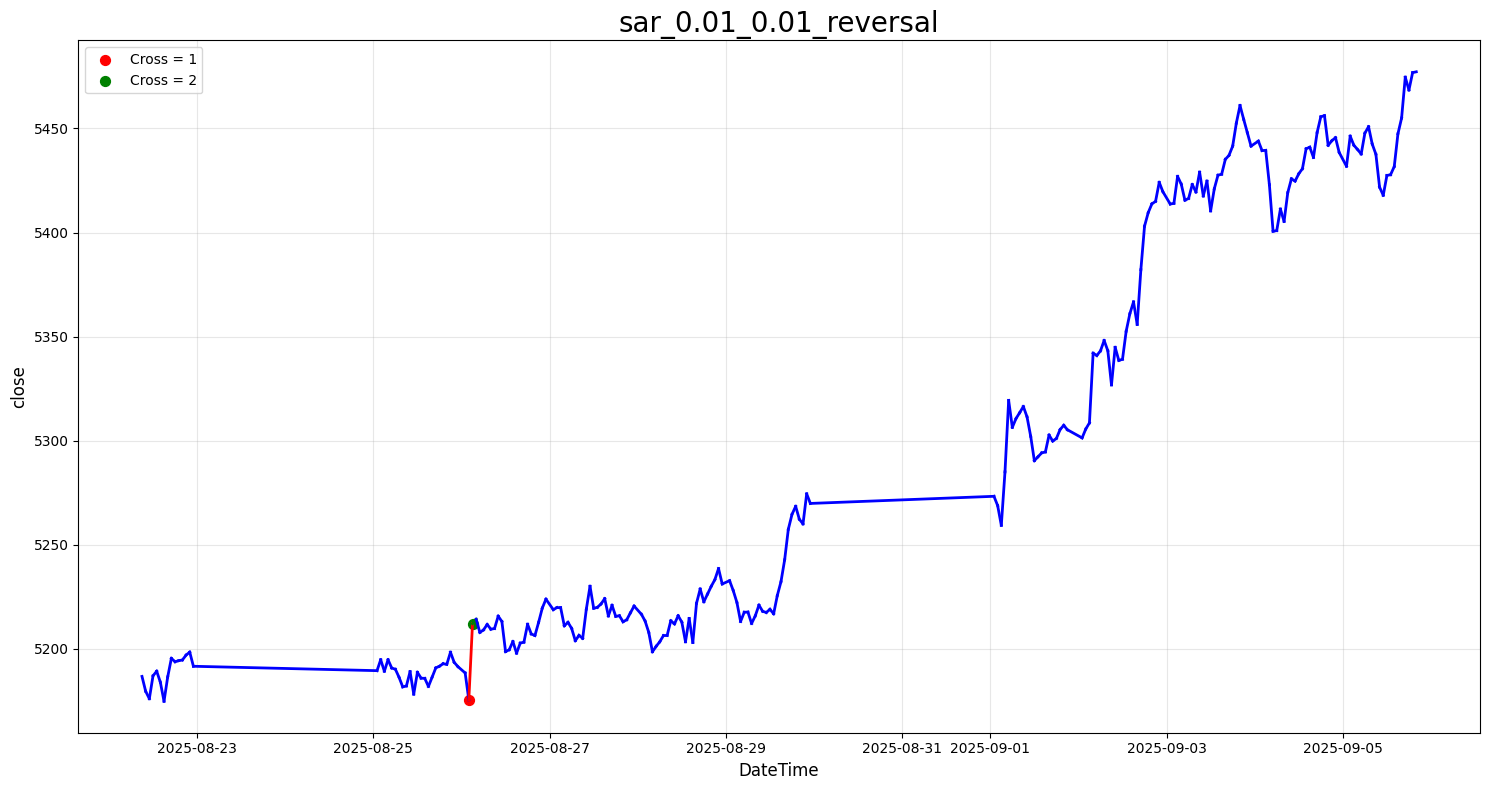

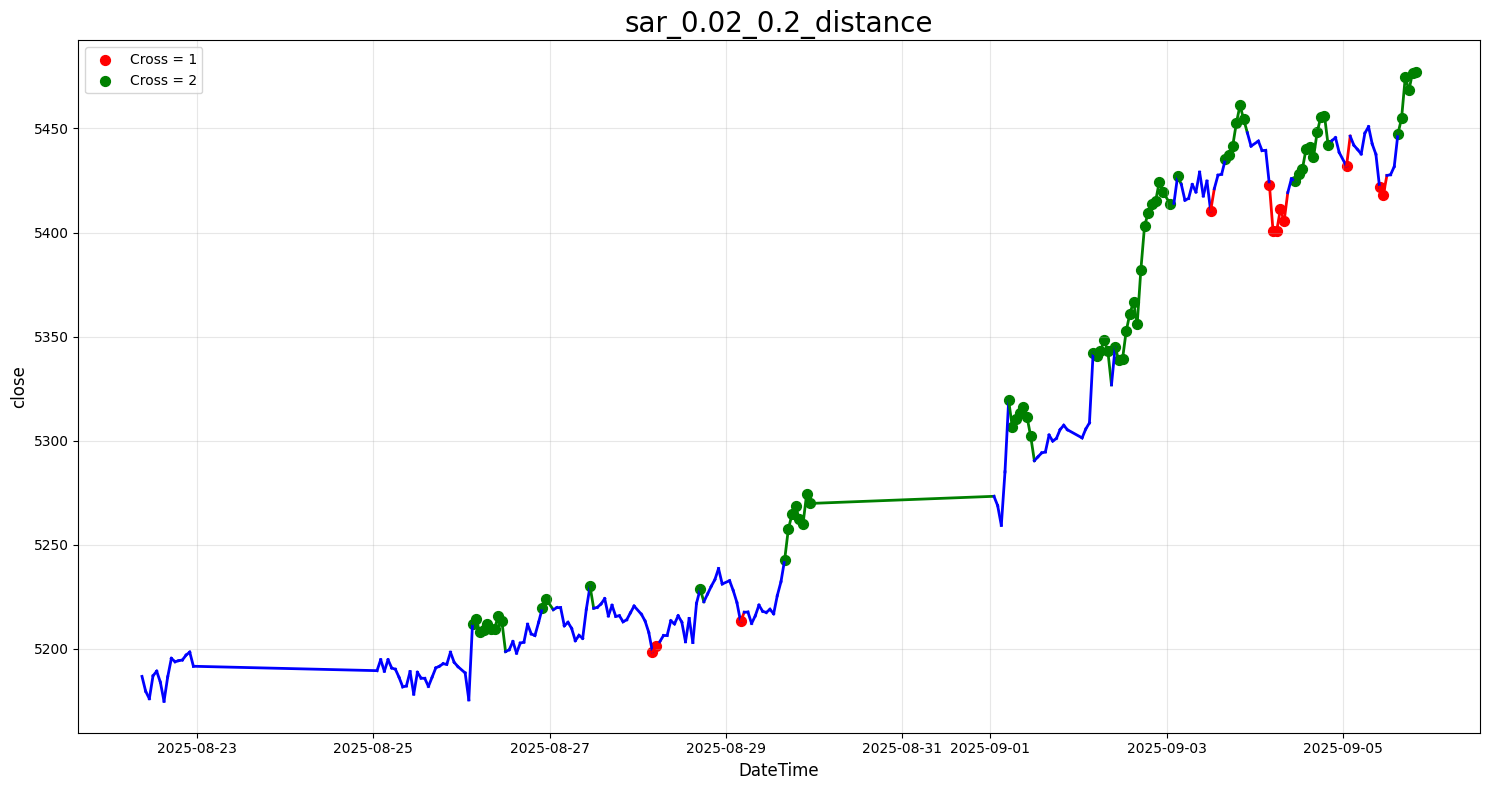

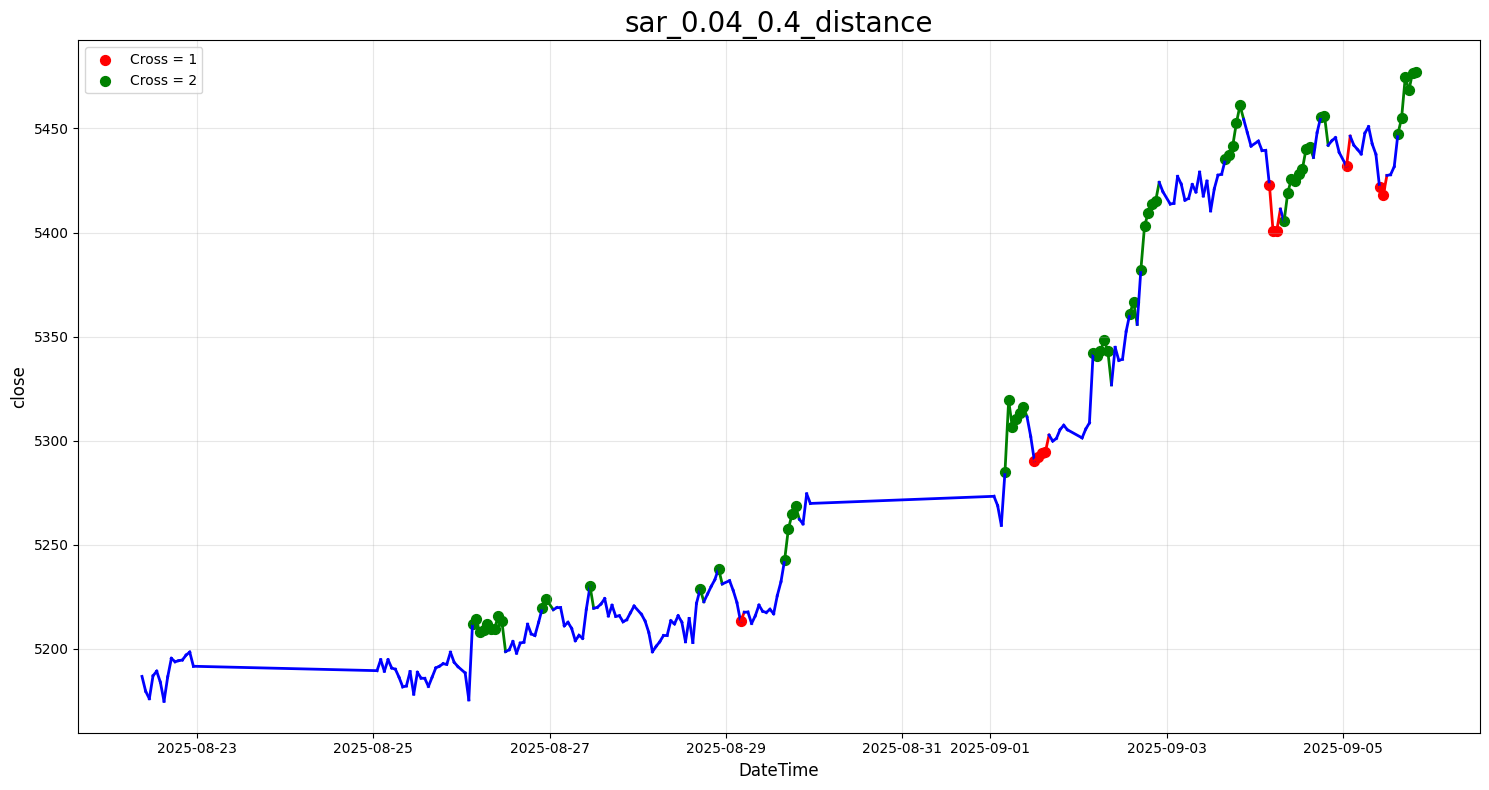

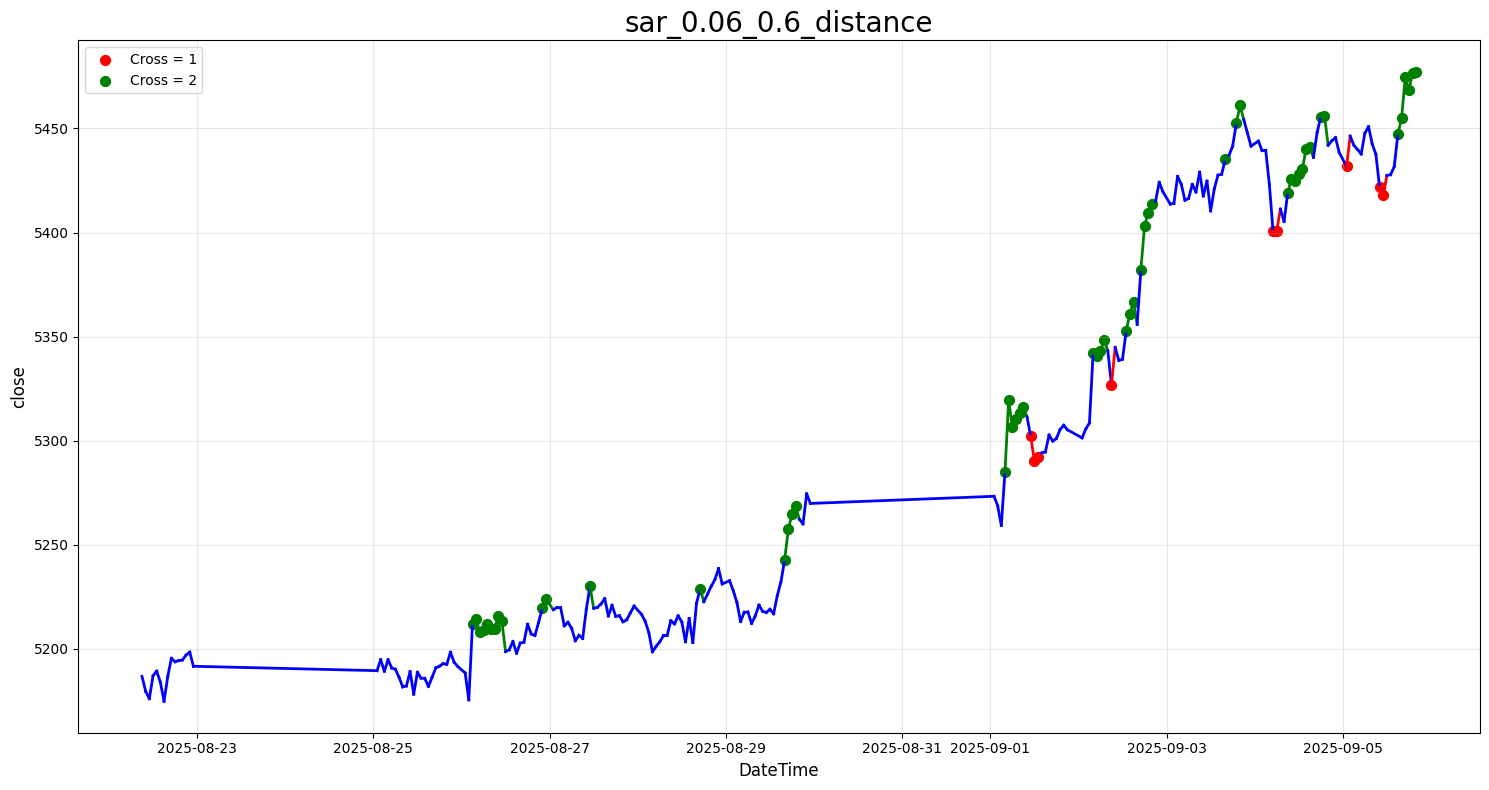

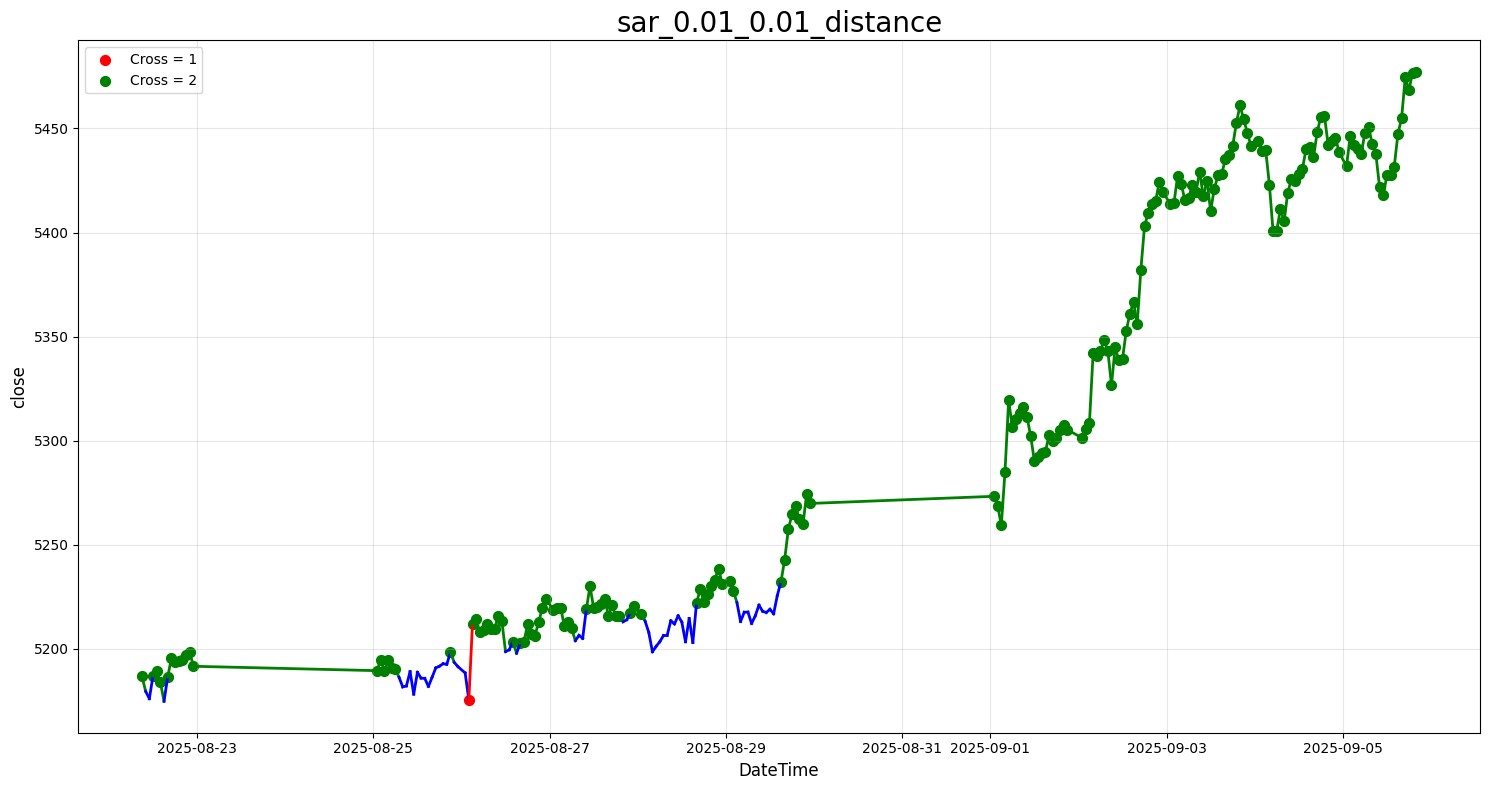

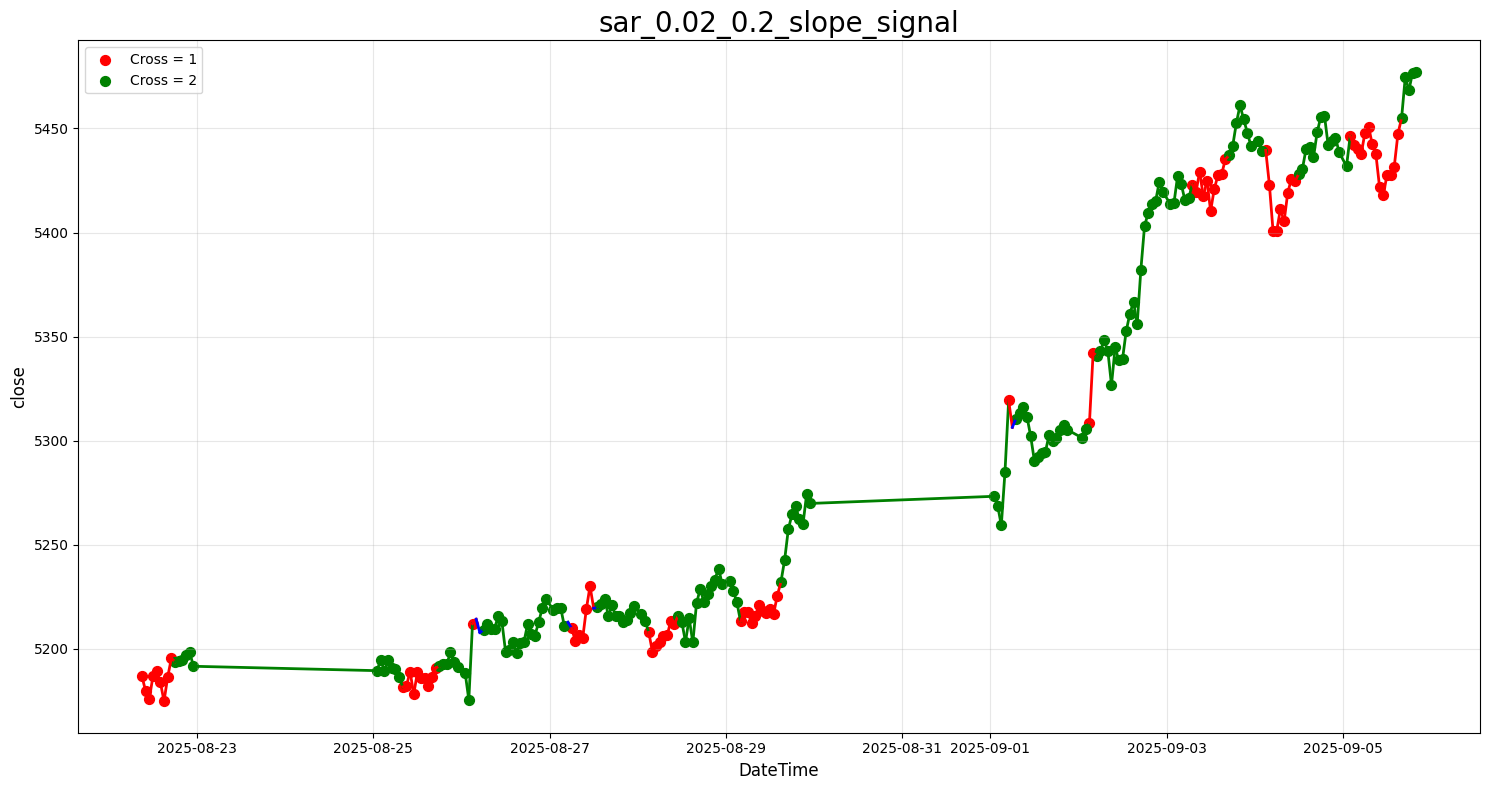

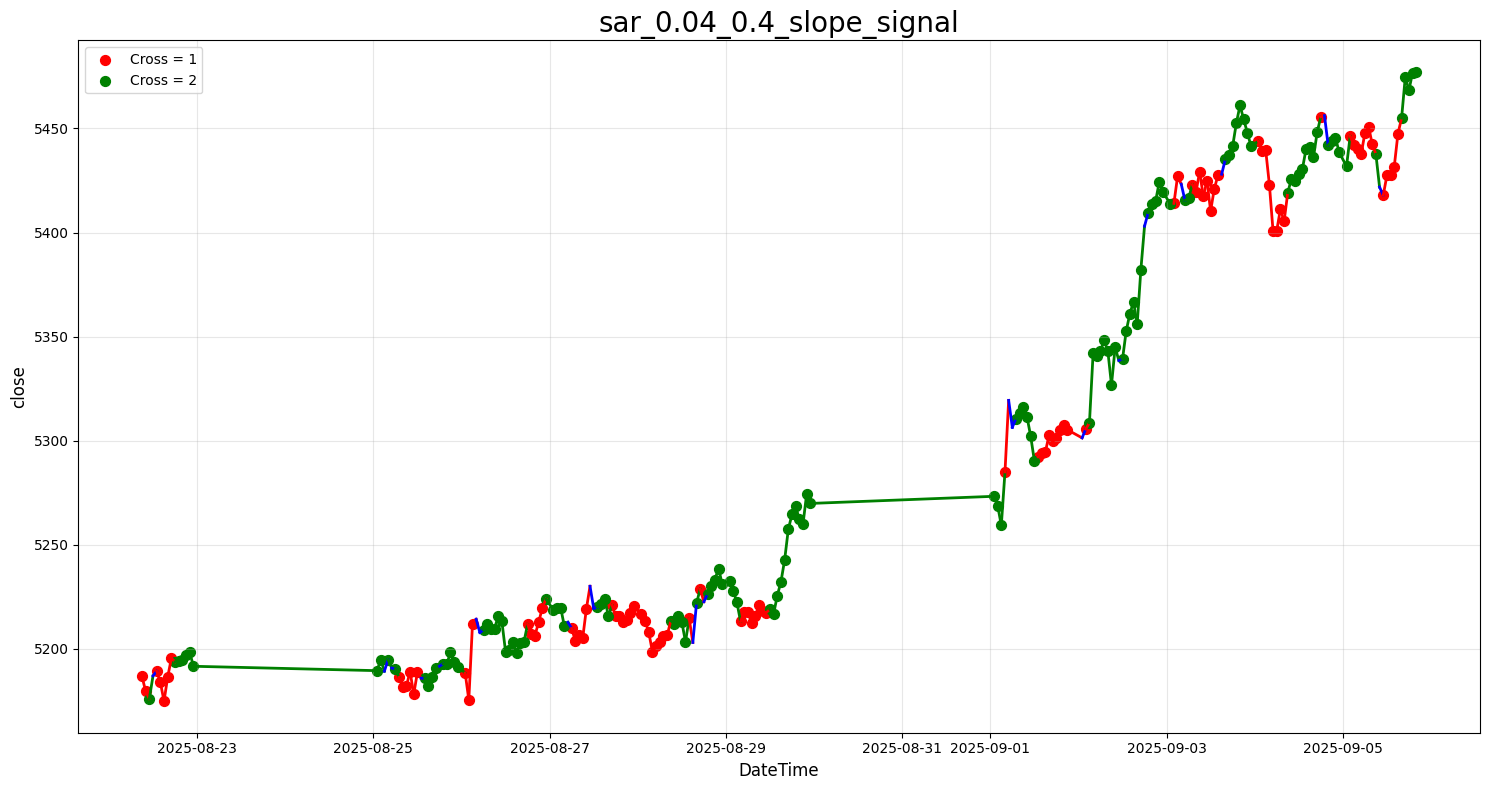

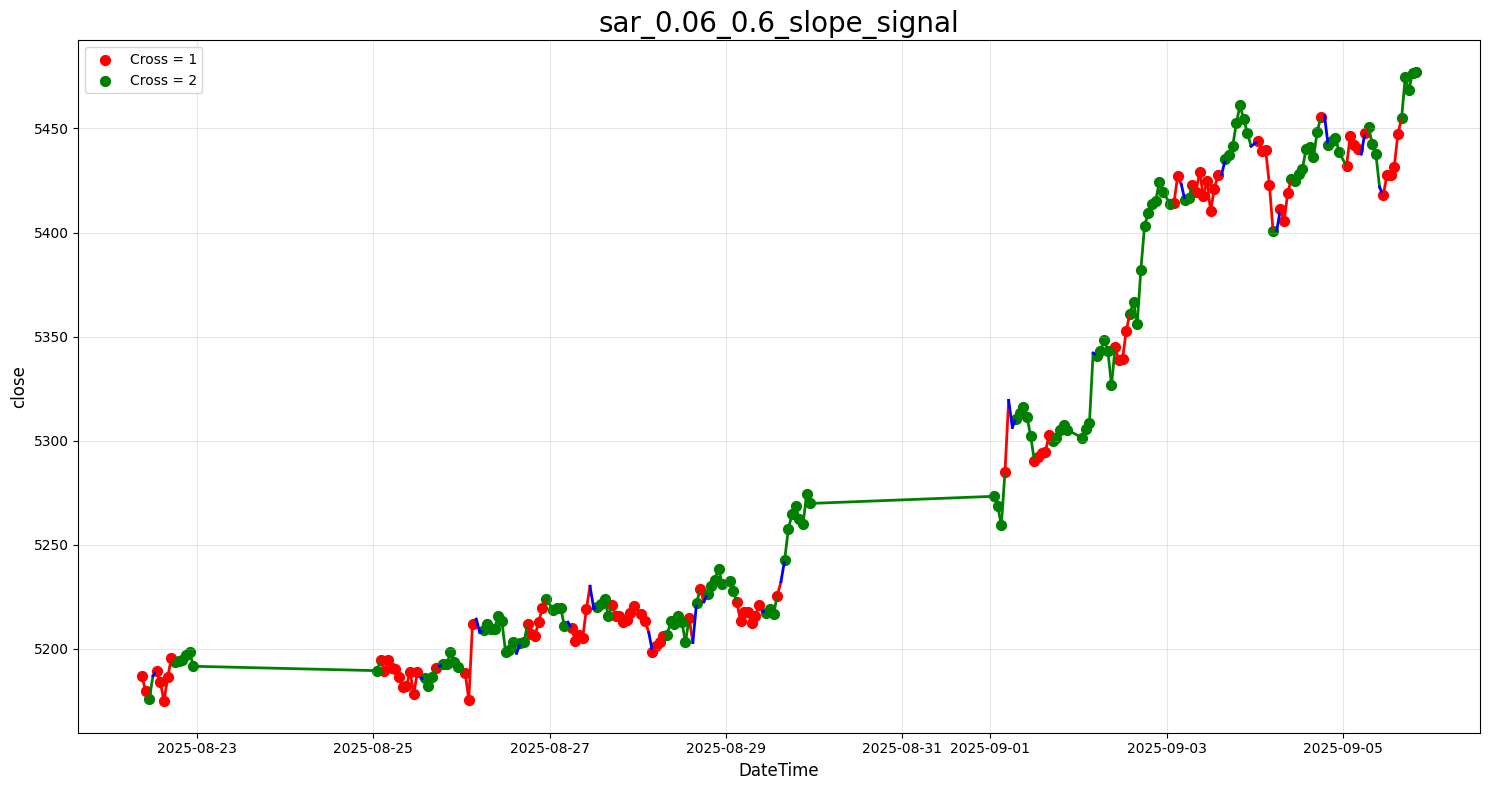

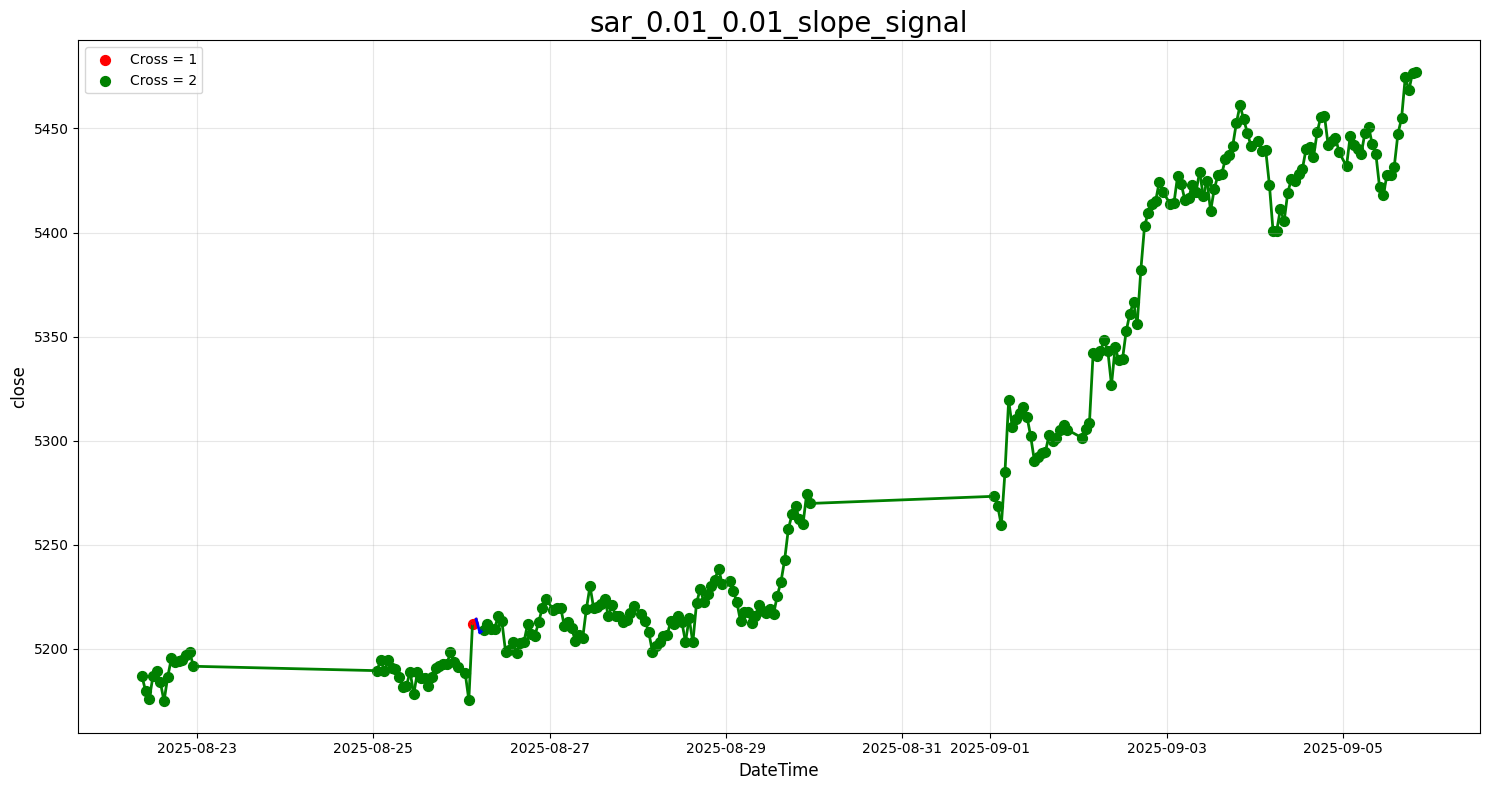

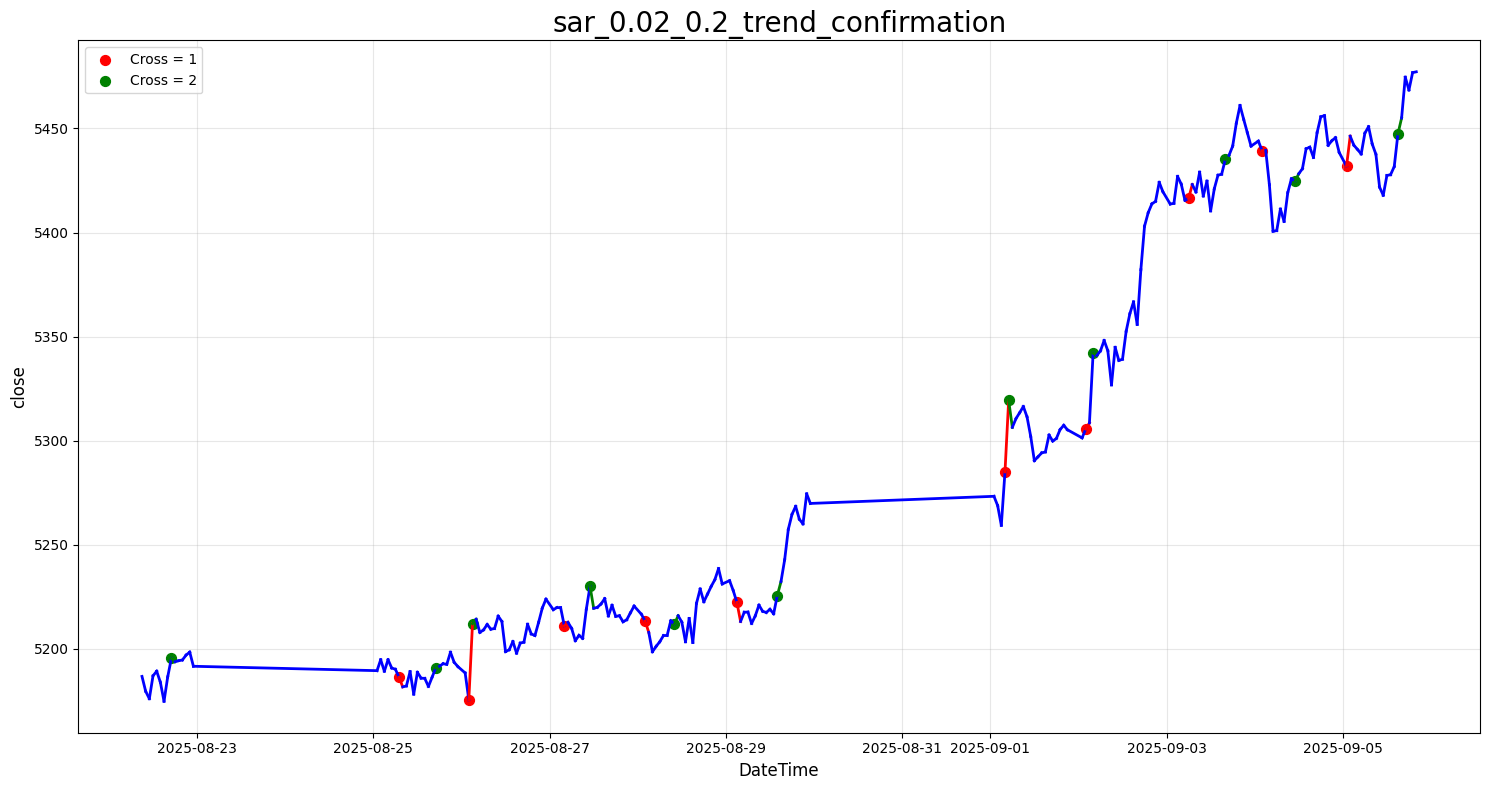

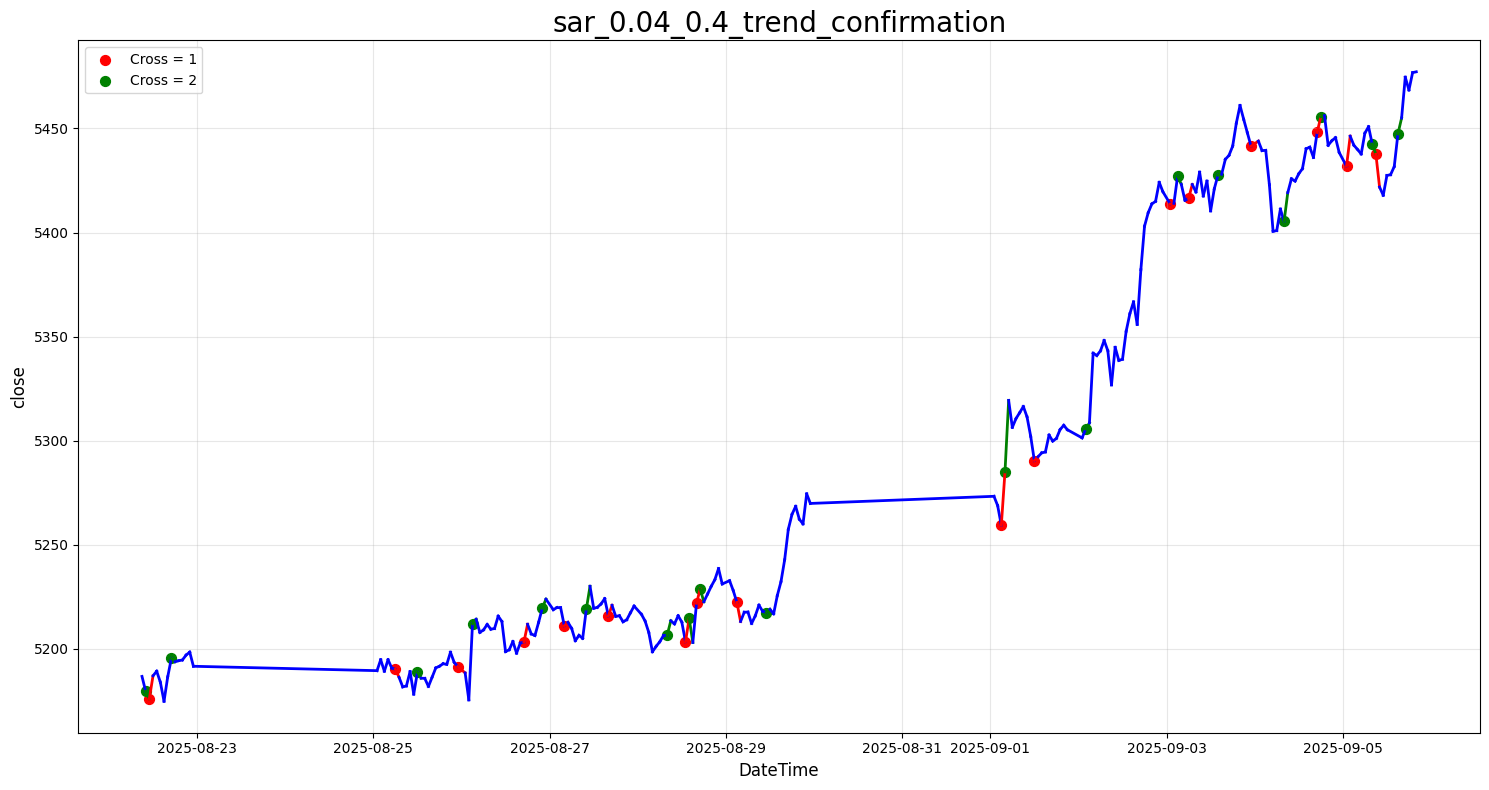

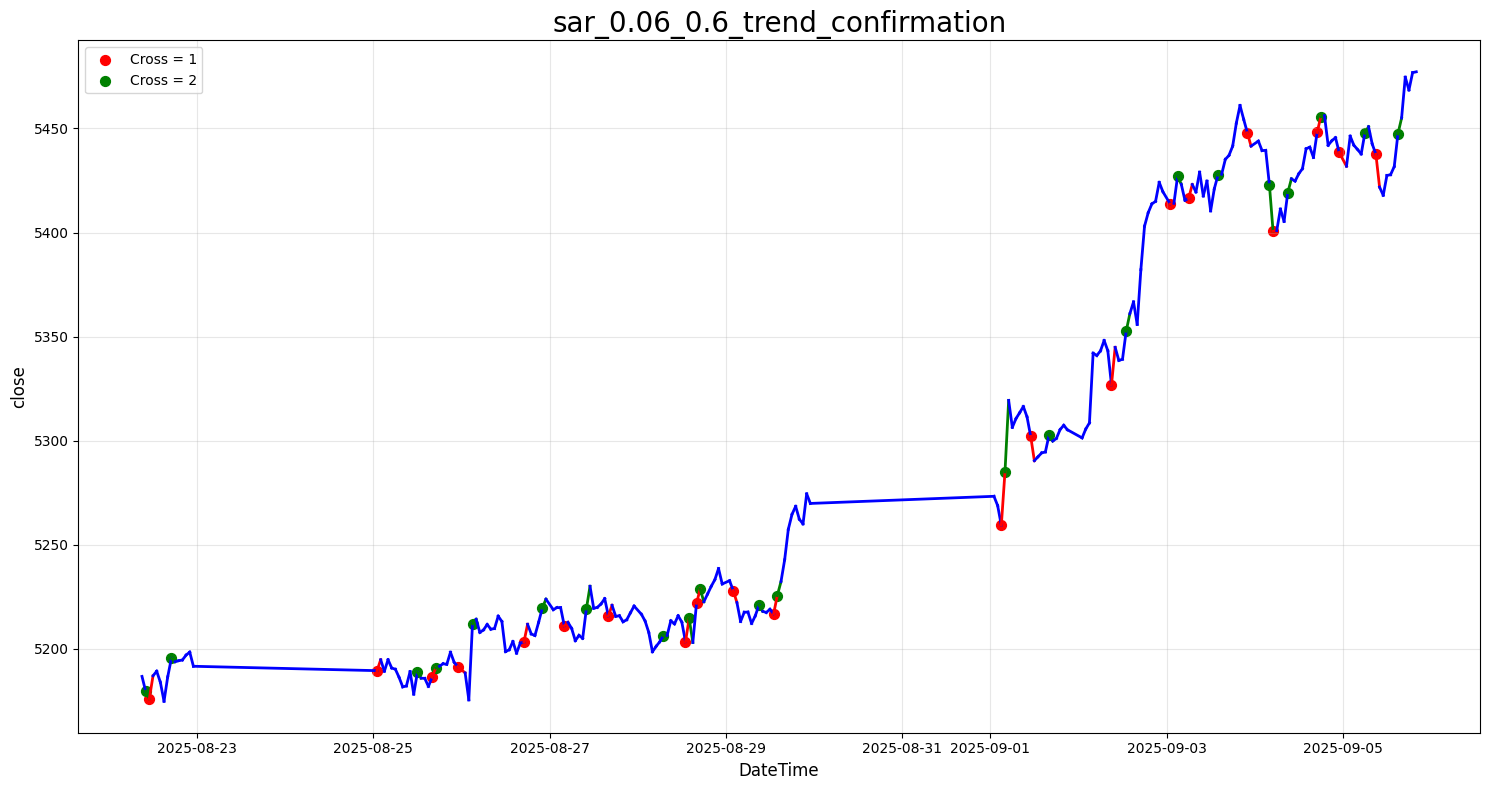

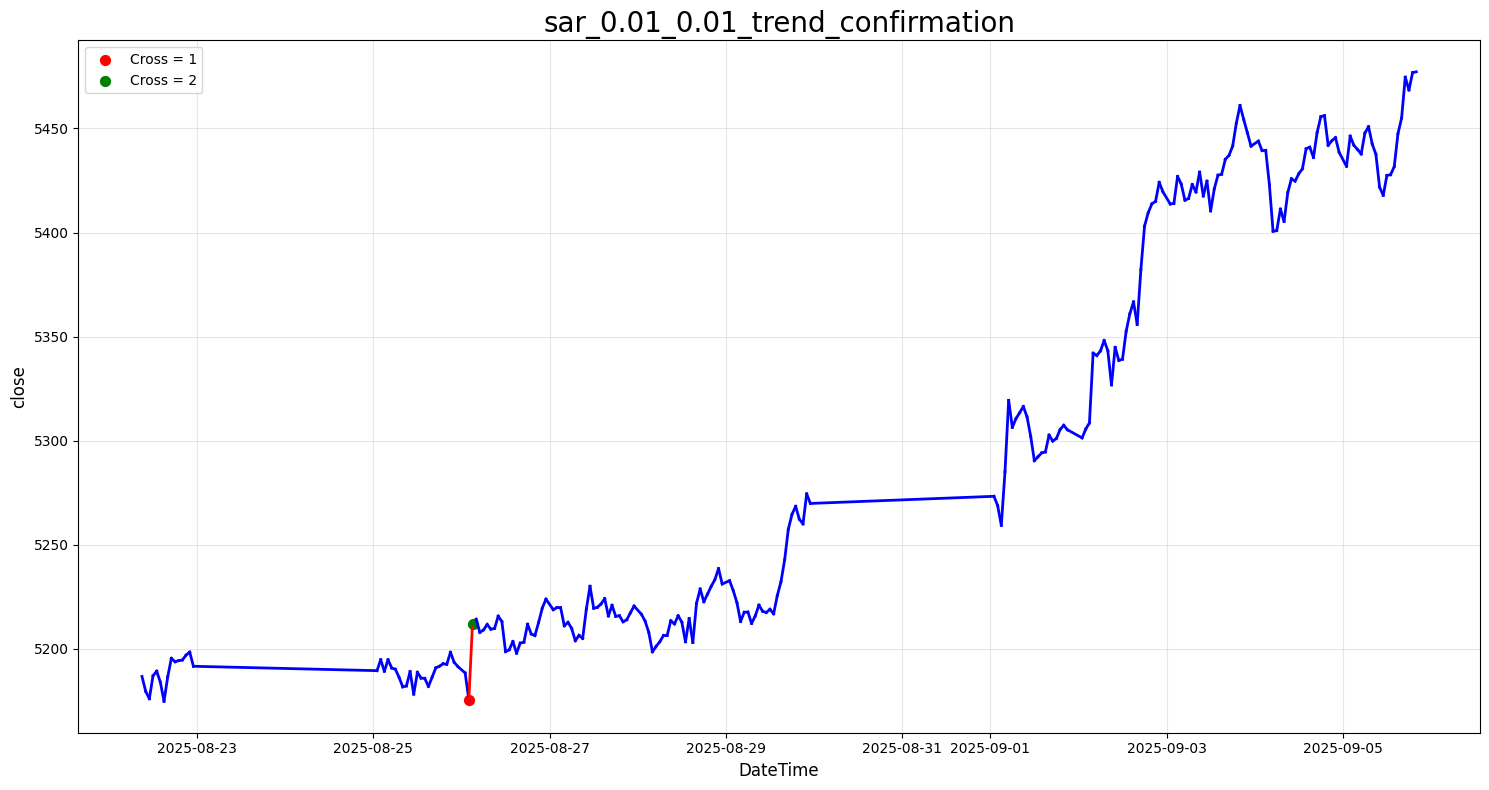

In [4]:
plotter = ForexPlotter(data = trend_signals_data)
plotter.plot_signals(periods = 240)